In [1]:
from numpy.polynomial import polynomial as P

from src import data_catalog
from src import tseries_mod
from src.utils import time_year_plus_frac
from src.utils_plot import plot_1ds

%matplotlib inline

In [2]:
data_catalog.set_catalog('cesm_coupled')
regions = ['Global']

active catalog: cesm_coupled


In [3]:
def polyfit_summary(t, y):
    pf0, stats0 = P.polyfit(t, y, 0, full=True)
    pf1, stats1 = P.polyfit(t, y, 1, full=True)
    mean = pf0[0]
    slope = pf1[1]
    var_expl = 1.0 - stats1[0][0] / stats0[0][0]
    print(f'    mean={mean}, slope={slope}, variance explained={var_expl}')

def Cinv_ocn_drift_summary(experiment, varnames = ['DIC_vertint', 'DOC_vertint', 'DOCr_vertint']):
    ds_ann = tseries_mod.tseries_get_vars(varnames, 'ocn', experiment, freq='ann')
    for region in regions:
        y_sum = None
        for varname in varnames:
            title = ' '.join([experiment, varname, region])
            plot_1ds(ds_ann, [varname], title=title, region_val=region)
            t = time_year_plus_frac(ds_ann, 'time')
            y = ds_ann[varname].sel(region=region).values
            print(f'summary for {varname}')
            polyfit_summary(t, y)
            y_sum = y if y_sum is None else y_sum + y
        # assume t from last varname is applicable
        print(f'summary for sum over vars')
        polyfit_summary(t, y_sum)

summary for DIC_vertint
    mean=37081.07161718749, slope=-0.04696060606030195, variance explained=0.9939480032536314
summary for DOC_vertint
    mean=23.45584025828043, slope=4.409014687924425e-05, variance explained=0.05167561062729931
summary for DOCr_vertint
    mean=356.4151729736326, slope=-0.0004780174923332377, variance explained=0.9980343214464976
summary for sum over vars
    mean=37460.94263020831, slope=-0.047394475301970405, variance explained=0.9937891881775589


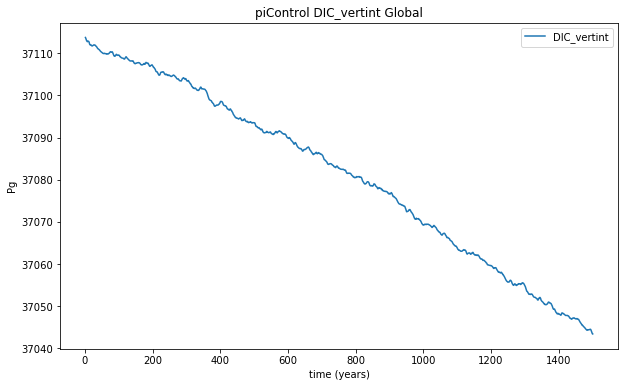

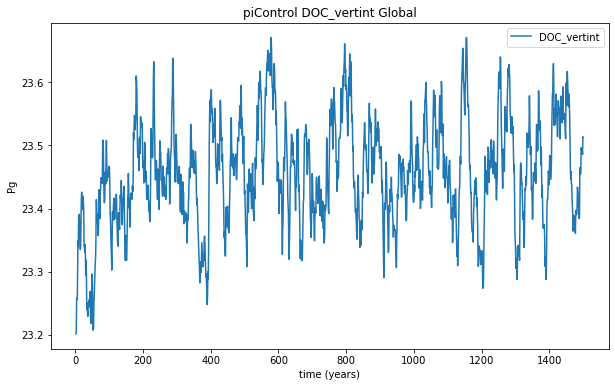

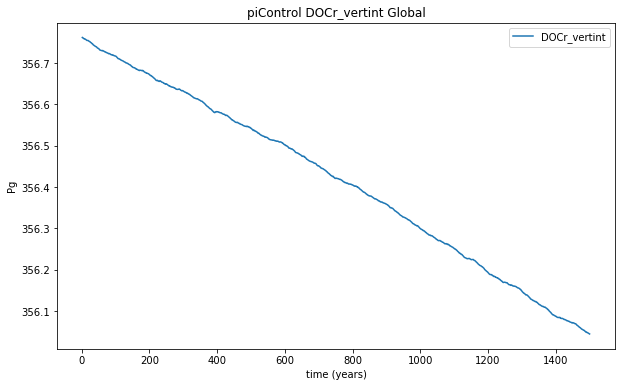

In [4]:
Cinv_ocn_drift_summary(experiment='piControl')

summary for DIC_vertint
    mean=37097.54743079911, slope=-0.056827536608012236, variance explained=0.994561968538829
summary for DOC_vertint
    mean=23.343982073491468, slope=0.000158426311668431, variance explained=0.05349953468167867
summary for DOCr_vertint
    mean=356.6557471021144, slope=-0.0004122493368108044, variance explained=0.9964918138146134
summary for sum over vars
    mean=37477.54721161072, slope=-0.05708222709036156, variance explained=0.9938092751629092


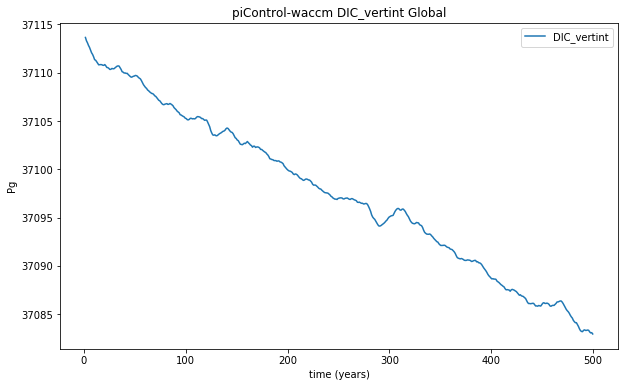

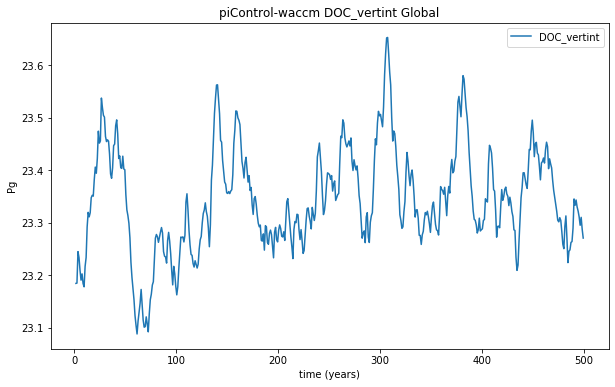

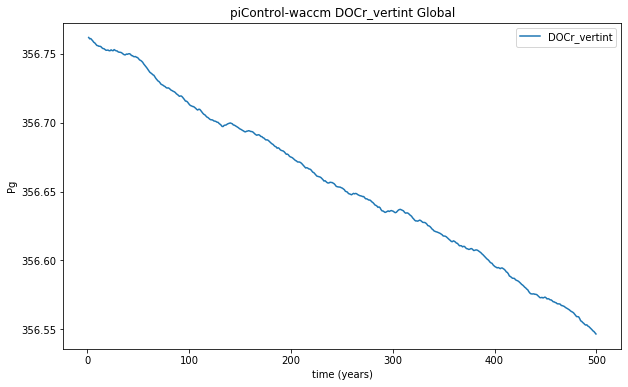

In [5]:
Cinv_ocn_drift_summary(experiment='piControl-waccm')

summary for DIC_vertint
    mean=37091.693652343754, slope=-0.034067337014021974, variance explained=0.8173388459744289
summary for DOC_vertint
    mean=23.39455699920655, slope=0.0003061009564995395, variance explained=0.015609443153778324
summary for DOCr_vertint
    mean=356.5190181732179, slope=-0.0005506345276171291, variance explained=0.9933743319881251
summary for sum over vars
    mean=37471.607421875015, slope=-0.03431328606615004, variance explained=0.7882681399848271


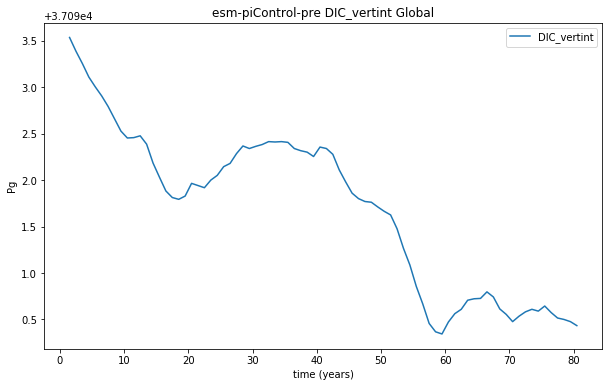

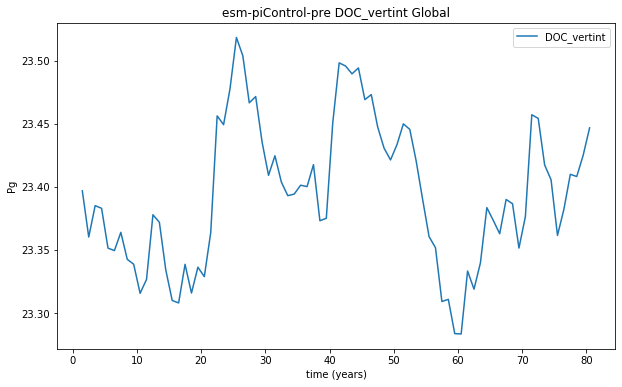

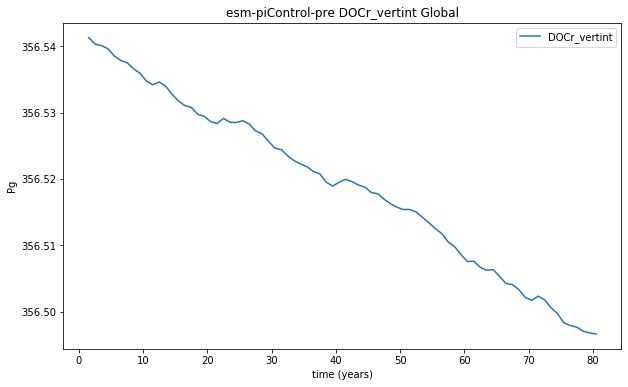

In [6]:
Cinv_ocn_drift_summary(experiment='esm-piControl-pre')

summary for DIC_vertint
    mean=37087.3471640625, slope=-0.015232741168812739, variance explained=0.842454444431147
summary for DOC_vertint
    mean=23.46527574157715, slope=-4.646097849451938e-05, variance explained=0.0052663201680480665
summary for DOCr_vertint
    mean=356.3767658691405, slope=-0.00047940697851344885, variance explained=0.993010411066968
summary for sum over vars
    mean=37467.1892578125, slope=-0.01575874002460763, variance explained=0.842929286364472


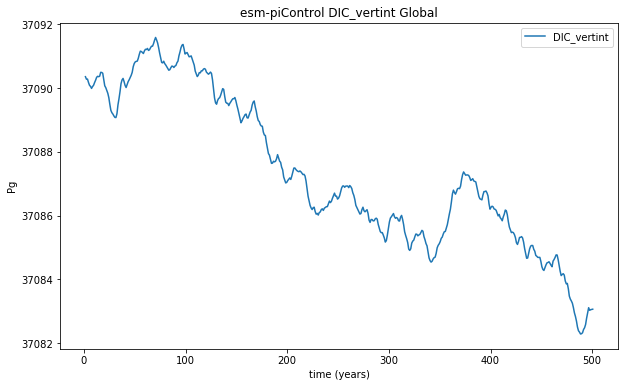

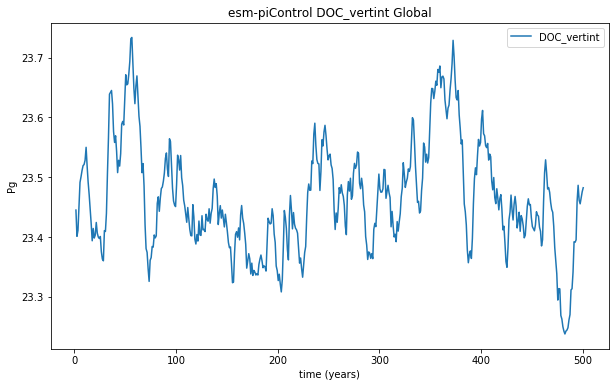

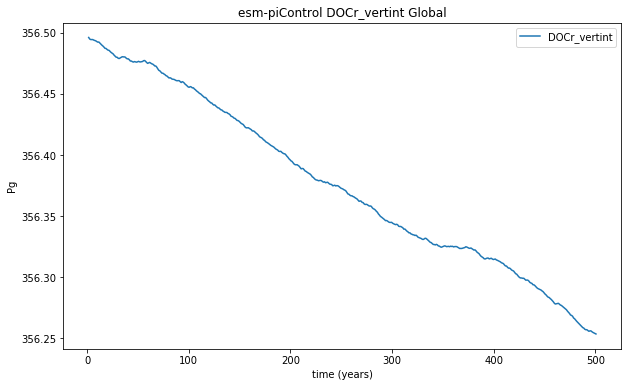

In [7]:
Cinv_ocn_drift_summary(experiment='esm-piControl')

summary for DIC_vertint
    mean=36427.722781250006, slope=-0.022988064317408505, variance explained=0.9804493113606642
summary for DOC_vertint
    mean=9.592662517547605, slope=-6.04738395292599e-05, variance explained=0.1012296514315173
summary for sum over vars
    mean=36437.3154453125, slope=-0.02304853950489599, variance explained=0.9809226086682982


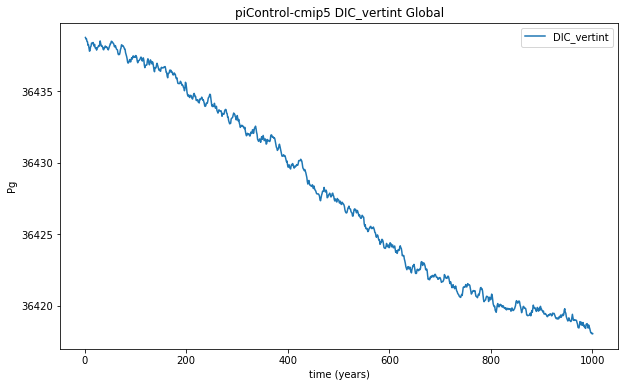

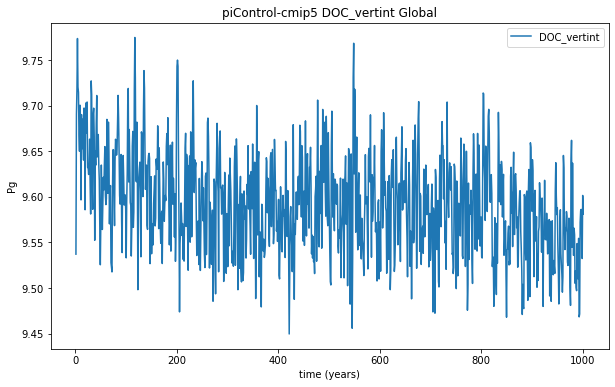

In [8]:
Cinv_ocn_drift_summary(experiment='piControl-cmip5', varnames = ['DIC_vertint', 'DOC_vertint'])

summary for DIC_vertint
    mean=36426.79095312503, slope=-0.017886182989575856, variance explained=0.9304778297033567
summary for DOC_vertint
    mean=9.589965471267705, slope=-8.07154161726608e-05, variance explained=0.18916640111338479
summary for sum over vars
    mean=36436.38093359376, slope=-0.0179672038614473, variance explained=0.9306804834119523


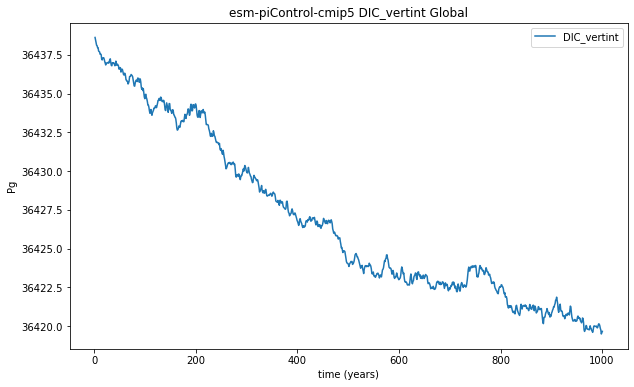

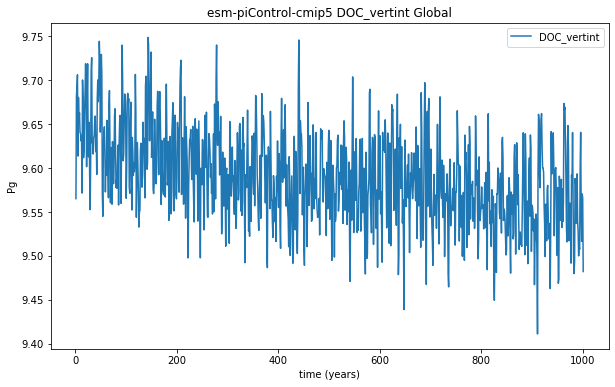

In [9]:
Cinv_ocn_drift_summary(experiment='esm-piControl-cmip5', varnames = ['DIC_vertint', 'DOC_vertint'])